In [ ]:
# パラメータカウント
def count_parameters(model):
  params = 0
  for p in model.parameters():
      if p.requires_grad:
          params += p.numel()
  return params


In [ ]:
import torchvision
import torch.nn as nn
import torch
from torchvision.models.detection.ssd import (
    SSD,
    DefaultBoxGenerator,
    SSDHead
)
def create_model(num_classes=91, size=300, nms=0.45):
    model_backbone = torchvision.models.resnet34(
        weights=torchvision.models.ResNet34_Weights.DEFAULT
    )
    conv1 = model_backbone.conv1
    bn1 = model_backbone.bn1
    relu = model_backbone.relu
    max_pool = model_backbone.maxpool
    layer1 = model_backbone.layer1
    layer2 = model_backbone.layer2
    layer3 = model_backbone.layer3
    layer4 = model_backbone.layer4
    backbone = nn.Sequential(
        conv1, bn1, relu, max_pool,
        layer1, layer2, layer3, layer4
    )
    out_channels = [512, 512, 512, 512, 512, 512]
    anchor_generator = DefaultBoxGenerator(
        [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
    )
    num_anchors = anchor_generator.num_anchors_per_location()
    head = SSDHead(out_channels, num_anchors, num_classes)
    model = SSD(
        backbone=backbone,
        num_classes=num_classes,
        anchor_generator=anchor_generator,
        size=(size, size),
        head=head,
        nms_thresh=nms
    )
    return model

model = create_model(num_classes=2, size=512, nms=0.5)
torch.save(model, "custom_ssd.pth")
load_model = torch.load("custom_ssd.pth", weights_only=False)
print(load_model)
print(count_parameters(load_model))

SSD(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
ssdlite = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=False, num_classes=2)
print(ssdlite)
print(count_parameters(ssdlite))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


SSD(
  (backbone): SSDLiteFeatureExtractorMobileNet(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (2): Hardswish()
        )
        (1): InvertedResidual(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
            (1): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            )
          )
        )
        (2): Invert

In [ ]:
import torchvision
import torch.nn as nn
import torch
from torchvision.models.detection.ssd import (
    SSD,
    DefaultBoxGenerator,
    SSDHead
)

# モデルのパラメータ数をカウントする関数
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def create_model(num_classes=91, size=(320, 320), nms=0.45):
    model_backbone = torchvision.models.mobilenet_v3_large(
        weights=torchvision.models.MobileNet_V3_Large_Weights.IMAGENET1K_V2
    )

    # MobileNetV3のバックボーンをそのまま使用
    backbone = model_backbone

    # 出力チャンネルの設定（MobileNetV3の特徴数を使用）
    out_channels = [model_backbone.classifier[3].in_features] * 6  # 最後の分類層の入力特徴数を使用

    anchor_generator = DefaultBoxGenerator(
        [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
    )
    num_anchors = anchor_generator.num_anchors_per_location()
    head = SSDHead(out_channels, num_anchors, num_classes)

    model = SSD(
        backbone=backbone,
        num_classes=num_classes,
        anchor_generator=anchor_generator,
        size=size,
        head=head,
        nms_thresh=nms
    )
    return model

# モデルの作成
model = create_model(num_classes=2, size=(360, 640), nms=0.5)

# モデルを保存
torch.save(model, "custom_ssd.pth")

# モデルの読み込み
load_model = torch.load("custom_ssd.pth")

# モデル情報とパラメータ数の表示
print(load_model)
print(f'Total parameters: {count_parameters(load_model)}')


SSD(
  (backbone): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
    

<ipython-input-133-ad51cbffefb6>:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model = torch.load("custom_ssd.pth")


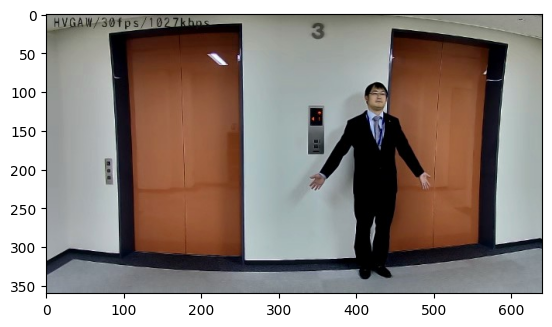

In [ ]:
from torchvision.io import read_image
import matplotlib.pyplot as plt

file_name = "9.jpg"
image = read_image(path=file_name)

plt.imshow(image.permute(1,2,0)); # 画像の表示

In [ ]:
import cv2
import numpy as np

filename = '9.jpg'

# 画像ファイルパスから読み込み
img = cv2.imread(filename)

# バイナリから読み込み(python3なのでbinaryモードで読み込み)
with open(filename, 'rb') as f:
    binary = f.read()
# 一度ndarrayに変換してからdecodeします。reshapeだけしてると思われます.
arr = np.asarray(bytearray(binary), dtype=np.uint8)
img = cv2.imdecode(arr, -1)  # 'load it as it is'

# numpy配列の取得、インスタンス自体がndarrayです
type(img) # numpy.ndarray

# デフォルトの色がBGR。
# 色の変換は充実。ただし指定のチェックは甘い(間違えて指定しても普通に変換される)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

load_model(np.array(rgb.reshape(3, 360, 640)))

# AttributeError: 'numpy.ndarray' object has no attribute 'dim'

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [ ]:
import cv2
import numpy as np
import torch

filename = '9.jpg'

# 画像ファイルパスから読み込み
img = cv2.imread(filename)

# バイナリから読み込み
with open(filename, 'rb') as f:
    binary = f.read()

# 一度ndarrayに変換してからdecodeします。
arr = np.asarray(bytearray(binary), dtype=np.uint8)
img = cv2.imdecode(arr, -1)  # 'load it as it is'

# BGRからRGBに変換
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# NumPy配列をPyTorchのTensorに変換
input_tensor = torch.tensor(rgb.transpose(2, 0, 1))  # [H, W, C]から[C, H, W]へ変換
input_tensor = input_tensor.float()  # Tensorのデータ型をfloatに変更

# バッチ次元を追加
input_tensor = input_tensor.unsqueeze(0)  # [1, C, H, W]

# モデルで推論
load_model.eval()  # モデルを評価モードに設定
with torch.no_grad():  # 勾配計算を無効にする
    output = load_model(input_tensor)

# 出力を確認
print(output)


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1000]

In [ ]:
input_tensor.shape

torch.Size([1, 3, 360, 640])

In [ ]:
import torchvision
import torch.nn as nn
import torch
from torchvision.models.detection.ssd import (
    SSD,
    DefaultBoxGenerator,
    SSDHead
)

# モデルのパラメータ数をカウントする関数
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def create_model(num_classes=91, size=(320, 320), nms=0.45):
    model_backbone = torchvision.models.mobilenet_v3_large(
        weights=torchvision.models.MobileNet_V3_Large_Weights.IMAGENET1K_V2,
        progress=True
    )

    # MobileNetV3のバックボーンをそのまま使用
    backbone = nn.Sequential(*list(model_backbone.children())[:-1])  # 最後の分類層を除外

    # 出力チャンネルの設定（MobileNetV3の特徴数を使用）
    out_channels = [model_backbone.last_channel] * 6  # 最後のチャンネル数を使用

    anchor_generator = DefaultBoxGenerator(
        [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
    )
    num_anchors = anchor_generator.num_anchors_per_location()
    head = SSDHead(out_channels, num_anchors, num_classes)

    model = SSD(
        backbone=backbone,
        num_classes=num_classes,
        anchor_generator=anchor_generator,
        size=size,
        head=head,
        nms_thresh=nms
    )
    return model

# モデルの作成
model = create_model(num_classes=2, size=(360, 640), nms=0.5)

# モデルを保存
torch.save(model, "custom_ssd.pth")

# モデルの読み込み
load_model = torch.load("custom_ssd.pth")

# モデル情報とパラメータ数の表示
print(load_model)
print(f'Total parameters: {count_parameters(load_model)}')


AttributeError: 'MobileNetV3' object has no attribute 'last_channel'